In [2]:
library('tidyverse')
library('ggplot2')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
##What are we looping over? each file
##So, we need to get a list of all the files

files = list.files(path = "./trees_raw/" , pattern = 'oak_treat*' )
files

[1] "oak_treat1_yr1.csv"        "oak_treat1_yr2.csv"       
 [3] "oak_treat1_yr3.csv"        "oak_treat13_yr1.csv"      
 [5] "oak_treat13_yr2.csv"       "oak_treat2_yr1.csv"       
 [7] "oak_treat2_yr2.csv"        "oak_treat2_yr3.csv"       
 [9] "oak_treat3_yr1.csv"        "oak_treat3_yr2.csv"       
[11] "oak_treat3_yr3.csv"        "oak_treat4_yr1.csv"       
[13] "oak_treat4_yr2.csv"        "oak_treat4_yr3.csv"       
[15] "oak_treatcontrols_yr1.csv" "oak_treatcontrols_yr2.csv"
[17] "oak_treatcontrols_yr3.csv"

In [11]:
df.meta = data.frame()
for (x in files){
    df = read.csv(paste0('./trees_raw/', x))
    Ncol = ncol(df)
    d = cbind(x, Ncol)
    df.meta = rbind(df.meta, d)
}

In [12]:
for (x in files){
    df = read.csv(paste0('./trees_raw/', x))
    Ncol = ncol(df)
    Year = strsplit(x, "_")[[1]][3]
    Year = strsplit(Year, "[.]")[[1]][1]
    if(Year != 'yr1' & Ncol != "44"){
        df = df %>% dplyr::select(-X)
    }
    write.csv(df, paste0("./trees_new/", x), row.names = FALSE)
   }


In [13]:
files = list.files(path = "./trees_new/", pattern = 'oak*')
data = data.frame()
for (x in files){
    df = read.csv(paste0('./trees_new/', x))
    file = x
    Ncol = ncol(df)
    d = cbind(file, Ncol)
    data = rbind(data, d)

   }



In [15]:
library(gtools)

In [ ]:
files = list.files(path = "./trees_new/", pattern = 'oak*')

df.meta = data.frame()
col.df = data.frame()

for (x in files){
    Treatment = strsplit(x , '[_]')[[1]][2]
    Year = strsplit(x, "_")[[1]][3]
    Year = strsplit(Year, "[.]")[[1]][1]
    df = read.csv(paste0("./trees_new/", x))
    if (Year == "yr1"){
        df = df} else{
        df$UV2 = NA
        
    }
    
    df$Year = Year
    df$Treatment = Treatment
    NCol = ncol(df)
    file = x
    d = cbind(file, Ncol)
    col.df = rbind(col.df, d)
    df.meta  = smartbind(df.meta,  df)
}

In [17]:
write.csv(df.meta, "./trees_new/df.meta.csv", row.names = FALSE)

In [18]:
#Drop rows with only na
df.2 = df.meta %>% drop_na(TagNo)
write.csv(df.2, "./trees_new/df.meta.csv", row.names = FALSE)

In [19]:
df.meta = read.csv("./trees_new/df.meta.csv")
treatment.df = read.csv('./trees_new/plot_treatment_exp.csv')


In [20]:
#add treatment burn information
df.meta = left_join(df.meta, treatment.df)
write.csv(df.meta, "./trees_new/df.meta.csv", row.names = FALSE)

Joining, by = "MacroPlot.Name"



Analysis

In [4]:
df.meta = read.csv("./trees_new/df.meta.csv")


Figures

In [ ]:
#Figure of ratio of live to dead trees before fire between treatments
#Before fire - Monitoring.Status - PreBurnYear1
#Treatments - post_budbreak; pre_budbreak; control


[1] "post_budbreak" "pre_budbreak"  "control"

[1] "post_budbreak" "pre_budbreak"  "control"

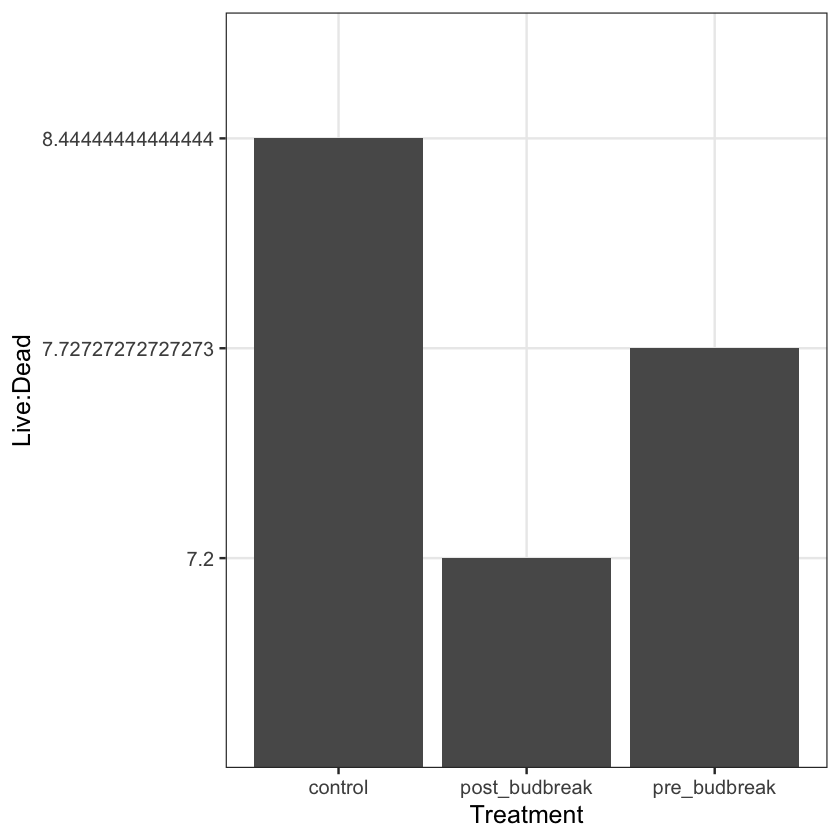

In [5]:
##Create new dataframe with just pre burn year 1
df.preburn = df.meta %>% filter(Monitoring.Status == "PreBurnYear1")
treatments = unique(df.preburn$treatment_burn)
treatments


df.ratios = data.frame()
for (x in treatments){
    df.treatment = df.preburn %>% filter(treatment_burn == x)
    Treatment = x
    ratio = (nrow(df.treatment  %>% filter(Status == "L")))/(nrow(df.treatment  %>% filter(Status == "D")))
    df.temp = cbind(Treatment, ratio)
    df.ratios = rbind(df.ratios, df.temp )
}

##Create new dataframe with just pre burn year 1
df.preburn = df.meta %>% filter(Monitoring.Status == "PreBurnYear1")
treatments = unique(df.preburn$treatment_burn)
treatments


df.ratios.yr1 = data.frame()
for (x in treatments){
    df.treatment = df.preburn %>% filter(treatment_burn == x)
    Treatment = x
    ratio = (nrow(df.treatment  %>% filter(Status == "L")))/(nrow(df.treatment  %>% filter(Status == "D")))
    df.temp = cbind(Treatment, ratio)
    df.ratios.yr1 = rbind(df.ratios.yr1 , df.temp )
}

df.ratios.yr1 = df.ratios.yr1 %>% mutate(MonitoringStatus = "PreBurnYear1")

ggplot(df.ratios, aes(x = Treatment, y = ratio)) +
    geom_col() +
    theme_bw(base_size = 15) +
    ylab("Live:Dead")

[1] "post_budbreak" "pre_budbreak"  "control"

Treatment,ratio,MonitoringStatus
<chr>,<chr>,<chr>
post_budbreak,2.5952380952381,PostBurnYear1
pre_budbreak,5.44827586206897,PostBurnYear1
control,8.55555555555556,PostBurnYear1


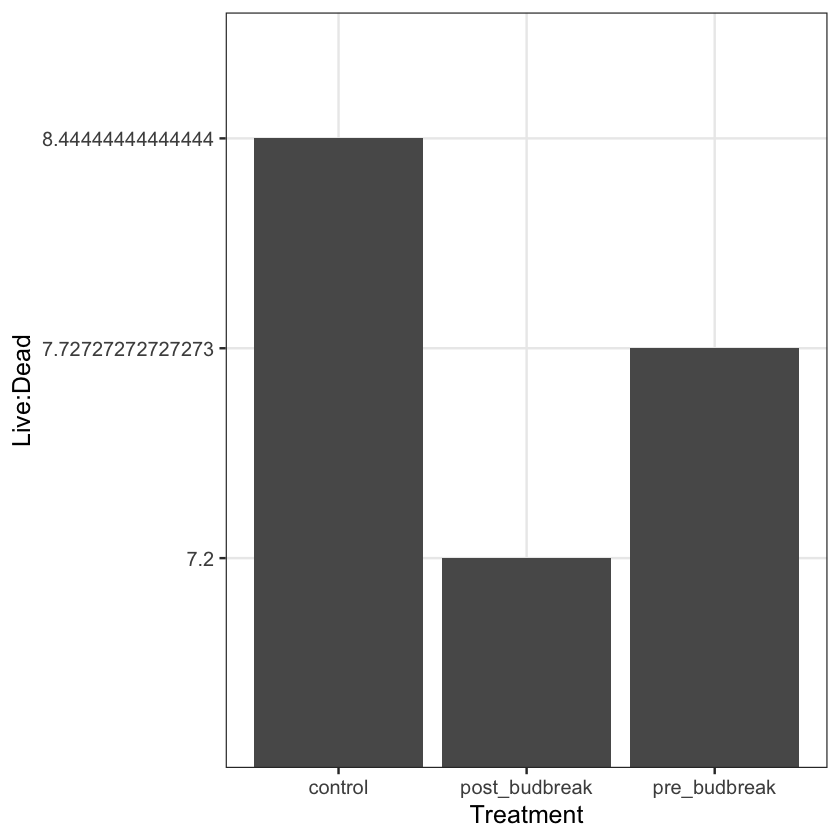

In [6]:
##Create new dataframe with just pre burn year 1
df.preburn = df.meta %>% filter(Monitoring.Status == "PostBurnYear1")
treatments = unique(df.preburn$treatment_burn)
treatments


df.ratios.yr1.post = data.frame()
for (x in treatments){
    df.treatment = df.preburn %>% filter(treatment_burn == x)
    Treatment = x
    ratio = (nrow(df.treatment  %>% filter(Status == "L")))/(nrow(df.treatment  %>% filter(Status == "D")))
    df.temp = cbind(Treatment, ratio)
    df.ratios.yr1.post = rbind(df.ratios.yr1.post, df.temp )
}

df.ratios.yr1.post = df.ratios.yr1.post %>% mutate(MonitoringStatus = "PostBurnYear1")
df.ratios.yr1.post

ggplot(df.ratios, aes(x = Treatment, y = ratio)) +
    geom_col() +
    theme_bw(base_size = 15) +
    ylab("Live:Dead")

In [7]:
df.ratios.yr1.post
df.ratios.yr1

Treatment,ratio,MonitoringStatus
<chr>,<chr>,<chr>
post_budbreak,2.5952380952381,PostBurnYear1
pre_budbreak,5.44827586206897,PostBurnYear1
control,8.55555555555556,PostBurnYear1


Treatment,ratio,MonitoringStatus
<chr>,<chr>,<chr>
post_budbreak,7.2,PreBurnYear1
pre_budbreak,7.72727272727273,PreBurnYear1
control,8.44444444444444,PreBurnYear1


In [8]:
df.yr1 = rbind(df.ratios.yr1, df.ratios.yr1.post)
df.yr1$ratio = as.numeric(df.yr1$ratio)

In [9]:
df.yr1

Treatment,ratio,MonitoringStatus
<chr>,<dbl>,<chr>
post_budbreak,7.200000,PreBurnYear1
pre_budbreak,7.727273,PreBurnYear1
control,8.444444,PreBurnYear1
post_budbreak,2.595238,PostBurnYear1
pre_budbreak,5.448276,PostBurnYear1
control,8.555556,PostBurnYear1


In [10]:
df.yr1 = df.yr1 %>%
    mutate(Treatment.MonitoringStatus = paste0(Treatment, "_", MonitoringStatus))


In [13]:
df.yr1

Treatment,ratio,MonitoringStatus,Treatment.MonitoringStatus
<chr>,<dbl>,<chr>,<chr>
post_budbreak,7.200000,PreBurnYear1,post_budbreak_PreBurnYear1
pre_budbreak,7.727273,PreBurnYear1,pre_budbreak_PreBurnYear1
control,8.444444,PreBurnYear1,control_PreBurnYear1
post_budbreak,2.595238,PostBurnYear1,post_budbreak_PostBurnYear1
pre_budbreak,5.448276,PostBurnYear1,pre_budbreak_PostBurnYear1
control,8.555556,PostBurnYear1,control_PostBurnYear1


In [11]:
unique(df.yr1$Treatment.MonitoringStatus)

[1] "post_budbreak_PreBurnYear1"  "pre_budbreak_PreBurnYear1"  
[3] "control_PreBurnYear1"        "post_budbreak_PostBurnYear1"
[5] "pre_budbreak_PostBurnYear1"  "control_PostBurnYear1"

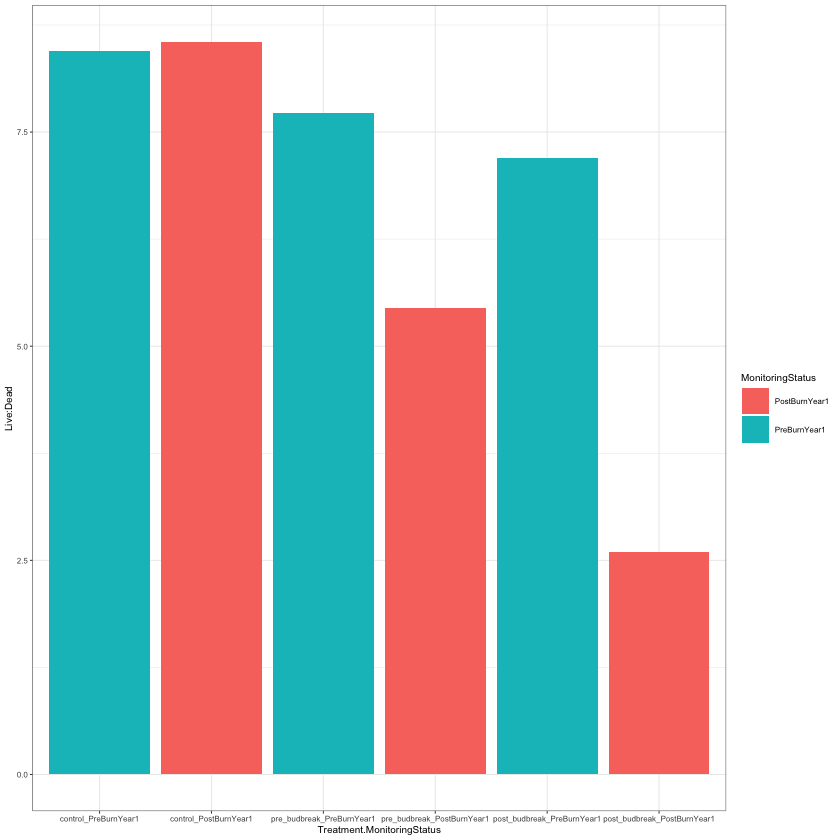

In [17]:
ggplot(df.yr1, aes(x = Treatment.MonitoringStatus, y = ratio, fill = MonitoringStatus)) +
    geom_col() +
    theme_bw(base_size = 6) +
    ylab("Live:Dead") +
    scale_x_discrete(limits = c('control_PreBurnYear1', 'control_PostBurnYear1', 'pre_budbreak_PreBurnYear1', 
                               'pre_budbreak_PostBurnYear1', 'post_budbreak_PreBurnYear1','post_budbreak_PostBurnYear1' ))

In [14]:
df.meta = df.meta %>% 
    mutate(Monitoring.Status = 
            ifelse(Monitoring.Status == "PreBurn", 'PreBurnYear1', Monitoring.Status))

In [26]:
df.meta %>%
    group_by(Year, treatment_burn) %>%
    count(Status)

Year,treatment_burn,Status,n
<chr>,<chr>,<chr>,<int>
yr1,control,D,9
yr1,control,L,76
yr1,post_budbreak,D,20
yr1,post_budbreak,L,144
yr1,pre_budbreak,D,22
yr1,pre_budbreak,L,170
yr2,control,D,9
yr2,control,L,77
yr2,post_budbreak,D,42


In [4]:
df.old = df.meta %>% filter(experiment == "old")
df.new = df.meta %>% filter(experiment == "new")


In [116]:
df.old %>%
    group_by(Year, treatment_burn) %>%
    count(Status)
    

Year,treatment_burn,Status,n
<chr>,<chr>,<chr>,<int>
yr1,control,D,1
yr1,control,L,4
yr1,post_budbreak,D,11
yr1,post_budbreak,L,76
yr1,pre_budbreak,D,13
yr1,pre_budbreak,L,85
yr2,control,D,1
yr2,control,L,4
yr2,post_budbreak,D,15
